In [1]:
import sys
import os
import shutil
sys.path.insert(0, 'icenumerics/')

import pandas as pd
import numpy as np
import scipy.spatial as spa
import matplotlib.pyplot as plt
import matplotlib as mpl

import icenumerics as ice
from icenumerics.geometry import ordering 
import csv as csv
import time
import string as st
from multiprocessing import Pool

import copy as cp

ureg = ice.ureg

idx = pd.IndexSlice

import tqdm.auto as tqdm

%reload_ext autoreload
%autoreload 2

In [ ]:
directory = "/home/carolina/Output_Sim_Summer_2020"
directory_DataFrame = "/home/carolina/DataFrames_Summer_2020"

In [26]:
def do_everything(exp_entry):
    e = exp_entry[1].e 
    l = exp_entry[1].l
    
    
    # <To change the seed of the thermal noise>
    
    np.random.seed()
    
    # <Introduce the parameters for the simulation>

    lattice_constant = 33*ureg.um
    lattice_size = [l,l]
    sp = ice.spins()
    sp.create_lattice("square",[l,l],lattice_constant=33*ureg.um, border="periodic")

    particle1 = ice.particle(radius = 1*ureg.um,
             susceptibility = 0.5,
             diffusion = 0.2188*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

    particle2 = ice.particle(radius = 1*ureg.um,
             susceptibility = 0.0675151,
             diffusion = 0.2188*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

    trap_short = ice.trap(trap_sep = 23*ureg.um,
                   height = 0.5*ureg.pN*ureg.nm,
                   stiffness = 6e-4*ureg.pN/ureg.nm)

    trap_long = ice.trap(trap_sep = 30.3558*ureg.um,
                   height = 0.5*ureg.pN*ureg.nm,
                   stiffness = 6e-4*ureg.pN/ureg.nm)



    traps = []
    particles = []

    for s in sp:

        if s.direction[1] == 0:
            # Horizontal traps
            traps.append(trap_short) 
            particles.append(particle1)
            pass

        else: 
            # Vertical traps
            traps.append(trap_long) 
            particles.append(particle2) 


    col = ice.colloidal_ice(sp, particles, traps , height_spread = 0 , susceptibility_spread = 0)
    
    # <Make the system periodic>
    
    col.region[:,:2]=(np.array([np.array([0,0]),lattice_size])-0.1)*(lattice_constant)
    col.region[:,2] = np.array([-.11,.11])*ureg.um
    
    # <Introduce the simulation parameters>
    
    world = ice.world(
        field = 70*ureg.mT,
        temperature = 300*ureg.K,
        dipole_cutoff = 200*ureg.um,
        boundaries = ["p", "p", "p"])

    total_time = 2000*ureg.s
    col.simulation(world,
                 name = "Bidisperse_Type4GS_l%u_exp%u"%(l,e),
                 include_timestamp = False,
                 targetdir = directory,
                 framerate = 1*ureg.Hz,
                 timestep = 10*ureg.ms,
                 run_time = total_time,
                 output = ["x","y","z","mux","muy","muz"])

    col.sim.field.fieldz = "v_Bmag"
    col.run_simulation()
    
    # <Load simulation and compute vertices dataframes>
    
    col.load_simulation(slice(0,None,15))
    
    v = ice.vertices()
    frames = col.trj.index.get_level_values("frame").unique()

    v_df = []

    for f in tqdm.tqdm(frames[::1]):
        col.set_state_from_frame(f)
        v = v.colloids_to_vertices(col)

        v_df.append(v.DataFrame())

    v_df = pd.concat(v_df, keys=frames[::1], names = ["frame"])
    
    # <Save the dataframe and create index of the runned simulation>
    
    v_df.to_csv(os.path.join(directory_DataFrame,"Bidisperse_Type4GS_l%u_exp%u"%(l,e)+".dat"), sep='\t')
    
    name = os.path.split(col.sim.base_name)[1]
    with open(os.path.join(directory,"index_Bidisperse_Type4GS.dat"),'a',newline='') as file:
        writer = csv.writer(file,delimiter='\t')
        writer.writerow([name, l, e])

In [27]:
e =  np.arange(0,50)
l =  np.arange(22,23)
L, E = np.meshgrid(l,e)
experiments = pd.DataFrame({"e":E.flatten(),"l":L.flatten()})

In [ ]:
# %%time
if __name__ ==  '__main__': 
    num_processors = 6
    p=Pool(processes = num_processors)
    
    ## Create index text file
    if not os.path.exists(directory):
        os.makedirs(directory)
    with open(os.path.join(directory,"index_Bidisperse.dat"),'w',newline='') as file:
        writer = csv.writer(file,delimiter='\t')
        writer.writerow(["filename", "l", "exp"])
        
    list(tqdm.tqdm(p.imap(do_everything, experiments.iterrows()), total=len(experiments)))

# Not parallel computation

In [2]:
directory = r"."

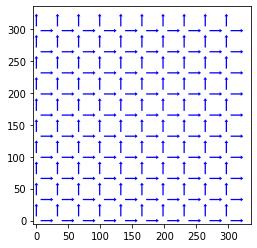

In [3]:
e = 1
l = 10
np.random.seed()
lattice_constant = 33*ureg.um
lattice_size = [l,l]
sp = ice.spins()
sp.create_lattice("square",[l,l],lattice_constant=33*ureg.um, border="periodic")
# sp.order_spins(ordering.random_ordering)

sp.display()

The following parameters were used to compute the results in ppt Results_November_2020_Recovering fully degeneracy in Square Colloidal Spin Ice. At slide number 9. 

The simulation parameters were total_time = 800s and field = 30mT

In [4]:

# particle1 = ice.particle(radius = 1*ureg.um,
#          susceptibility = 0.5,
#          diffusion = 0.125*ureg.um**2/ureg.s,
#          temperature = 300*ureg.K,
#          density = 1000*ureg.kg/ureg.m**3)

# particle2 = ice.particle(radius = 1*ureg.um,
#          susceptibility = 0.0675151,
#          diffusion = 0.125*ureg.um**2/ureg.s,
#          temperature = 300*ureg.K,
#          density = 1000*ureg.kg/ureg.m**3)

# trap_short = ice.trap(trap_sep = 23*ureg.um,
#                height = 0.5*ureg.pN*ureg.nm,
#                stiffness = 6e-4*ureg.pN/ureg.nm)

# trap_long = ice.trap(trap_sep = 30.3558*ureg.um,
#                height = 0.5*ureg.pN*ureg.nm,
#                stiffness = 6e-4*ureg.pN/ureg.nm)



New parameters in order to try to recover degeneracy.

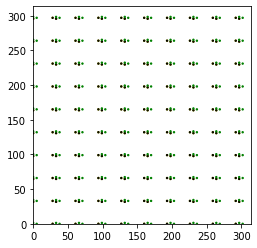

In [5]:


particle1 = ice.particle(radius = 1*ureg.um,
         susceptibility = 0.5,
         diffusion = 0.2188*ureg.um**2/ureg.s,
         temperature = 300*ureg.K,
         density = 1000*ureg.kg/ureg.m**3)

particle2 = ice.particle(radius = 1*ureg.um,
         susceptibility = 0.0675151,
         diffusion = 0.2188*ureg.um**2/ureg.s,
         temperature = 300*ureg.K,
         density = 1000*ureg.kg/ureg.m**3)

trap_short = ice.trap(trap_sep = 23*ureg.um,
               height = 0.5*ureg.pN*ureg.nm,
               stiffness = 6e-4*ureg.pN/ureg.nm)

trap_long = ice.trap(trap_sep = 30.3558*ureg.um,
               height = 0.5*ureg.pN*ureg.nm,
               stiffness = 6e-4*ureg.pN/ureg.nm)



traps = []
particles = []

for s in sp:

    if s.direction[1] == 0:
        # Horizontal traps
        traps.append(trap_short) 
        particles.append(particle1)
        pass

    else: 
        # Vertical traps
        traps.append(trap_long) 
        particles.append(particle2) 


# for s in sp:

#     if s.direction[1] == 0:
#         # Horizontal traps
#         traps.append(trap_long) 
#         particles.append(particle2)
#         print('h')
#         pass

#     else: 
#         # Vertical traps
#         traps.append(trap_short) 
#         particles.append(particle1) 
#         print('v')


col = ice.colloidal_ice(sp, particles, traps , height_spread = 0 , susceptibility_spread = 0)
col.display()

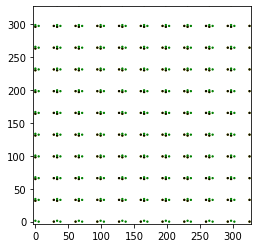

In [6]:
col.region[:,:2]=(np.array([np.array([0,0]),lattice_size])-0.1)*(lattice_constant)
col.region[:,2] = np.array([-.11,.11])*ureg.um

col.display()

In [7]:
world = ice.world(
    field = 70*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um,
    boundaries = ["p", "p", "p"])

total_time = 2000*ureg.s
col.simulation(world,
             name = "FullyDegeneracy_Type4_l%u_exp%u"%(l,e),
             include_timestamp = False,
             targetdir = directory,
             framerate = 1*ureg.Hz,
             timestep = 10*ureg.ms,
             run_time = total_time,
             output = ["x","y","z","mux","muy","muz"])


# col.sim.field.fieldz = 50*ureg.mT   
# String magnetic field ramp: "v_Bmag*time/%f"%total_time.to(ureg.us).magnitude

col.sim.field.fieldz = "v_Bmag"
col.run_simulation()

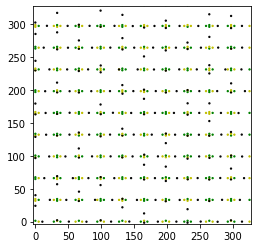

In [8]:
col.load_simulation()
col.display()

In [9]:
col.trj.tail()


type      x      y    z           mux        muy  muz       t
frame id                                                                
1999  396     4  165.0  313.5  0.0  1.858760e-15  30.355801  0.0  1999.0
      397     4  198.0  313.5  0.0  1.858760e-15  30.355801  0.0  1999.0
      398     4  231.0  313.5  0.0  1.858760e-15  30.355801  0.0  1999.0
      399     4  264.0  313.5  0.0  1.858760e-15  30.355801  0.0  1999.0
      400     4  297.0  313.5  0.0  1.858760e-15  30.355801  0.0  1999.0

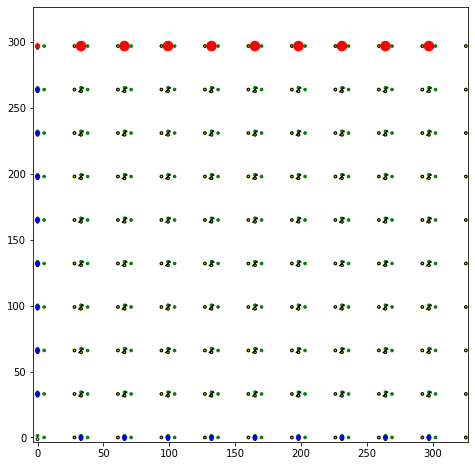

In [11]:
v = ice.vertices()
v = v.colloids_to_vertices(col)

f, (ax1) = plt.subplots(1,1,figsize = (8,8))


col.display(ax1)
v.display(ax1)

# Visual pre analysis of the Simulation

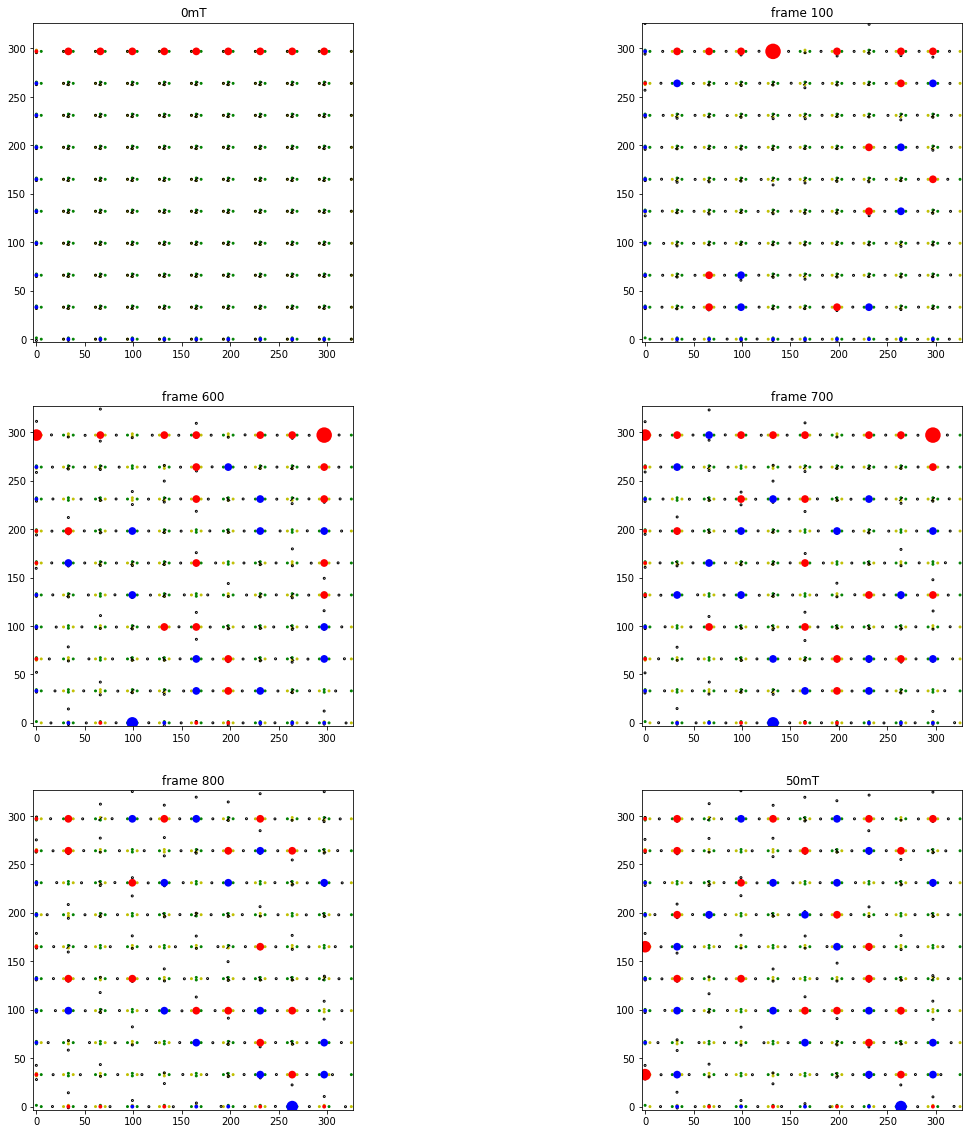

In [12]:

f, axes = plt.subplots(3,2,figsize = (20,20))
ax1, ax2, ax3, ax4, ax5,ax6 = axes.flatten()
i = 10
col.set_state_from_frame(0)
v = v.colloids_to_vertices(col)
ax1.set_title('0mT')
col.display(ax1)
v.display(ax1)
col.set_state_from_frame(10)
v = v.colloids_to_vertices(col)
col.calculate_energy(B = [0,0,50]*ureg.mT)
ax2.set_title('frame 100')
col.display(ax2)
v.display(ax2)
col.set_state_from_frame(500)
v = v.colloids_to_vertices(col)
col.calculate_energy(B = [0,0,50]*ureg.mT)
ax3.set_title('frame 600')
col.display(ax3)
v.display(ax3)
col.set_state_from_frame(501)
v = v.colloids_to_vertices(col)
col.calculate_energy(B = [0,0,50]*ureg.mT)
ax4.set_title('frame 700')
col.display(ax4)
v.display(ax4)
col.set_state_from_frame(1500)
v = v.colloids_to_vertices(col)
col.calculate_energy(B = [0,0,50]*ureg.mT)
ax5.set_title('frame 800')
col.display(ax5)
v.display(ax5)
col.set_state_from_frame(1501)
v = v.colloids_to_vertices(col)
col.calculate_energy(B = [0,0,50]*ureg.mT)
ax6.set_title('50mT')
col.display(ax6)
v.display(ax6)



# Following the Energy value of the whole system

In [13]:
col.set_state_from_frame(100)
col.calculate_energy(B = [0,0,70]*ureg.mT).magnitude

22611.218499471746

In [14]:
E = []
t = []
for i in range(0,2000):
    col.set_state_from_frame(i)
    E.append(col.calculate_energy(B = [0,0,70]*ureg.mT).magnitude)
    # 5 fr/s
    t.append(i)
    


The units of the energy are nanometer * piconewton

In [15]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 500

mpl.rcParams['font.family'] = 'serif'

# ax1.tick_params(axis='y', labelsize=30)    
  

# ax3.tick_params(axis='x', labelsize=30)

In [16]:
t[100], E[100], E[0], E[20]

(100, 22611.218499471746, 135569.1179098389, 22762.893536244163)

In [17]:
43705.0334317352467/37613.77329827

1.161942278036365

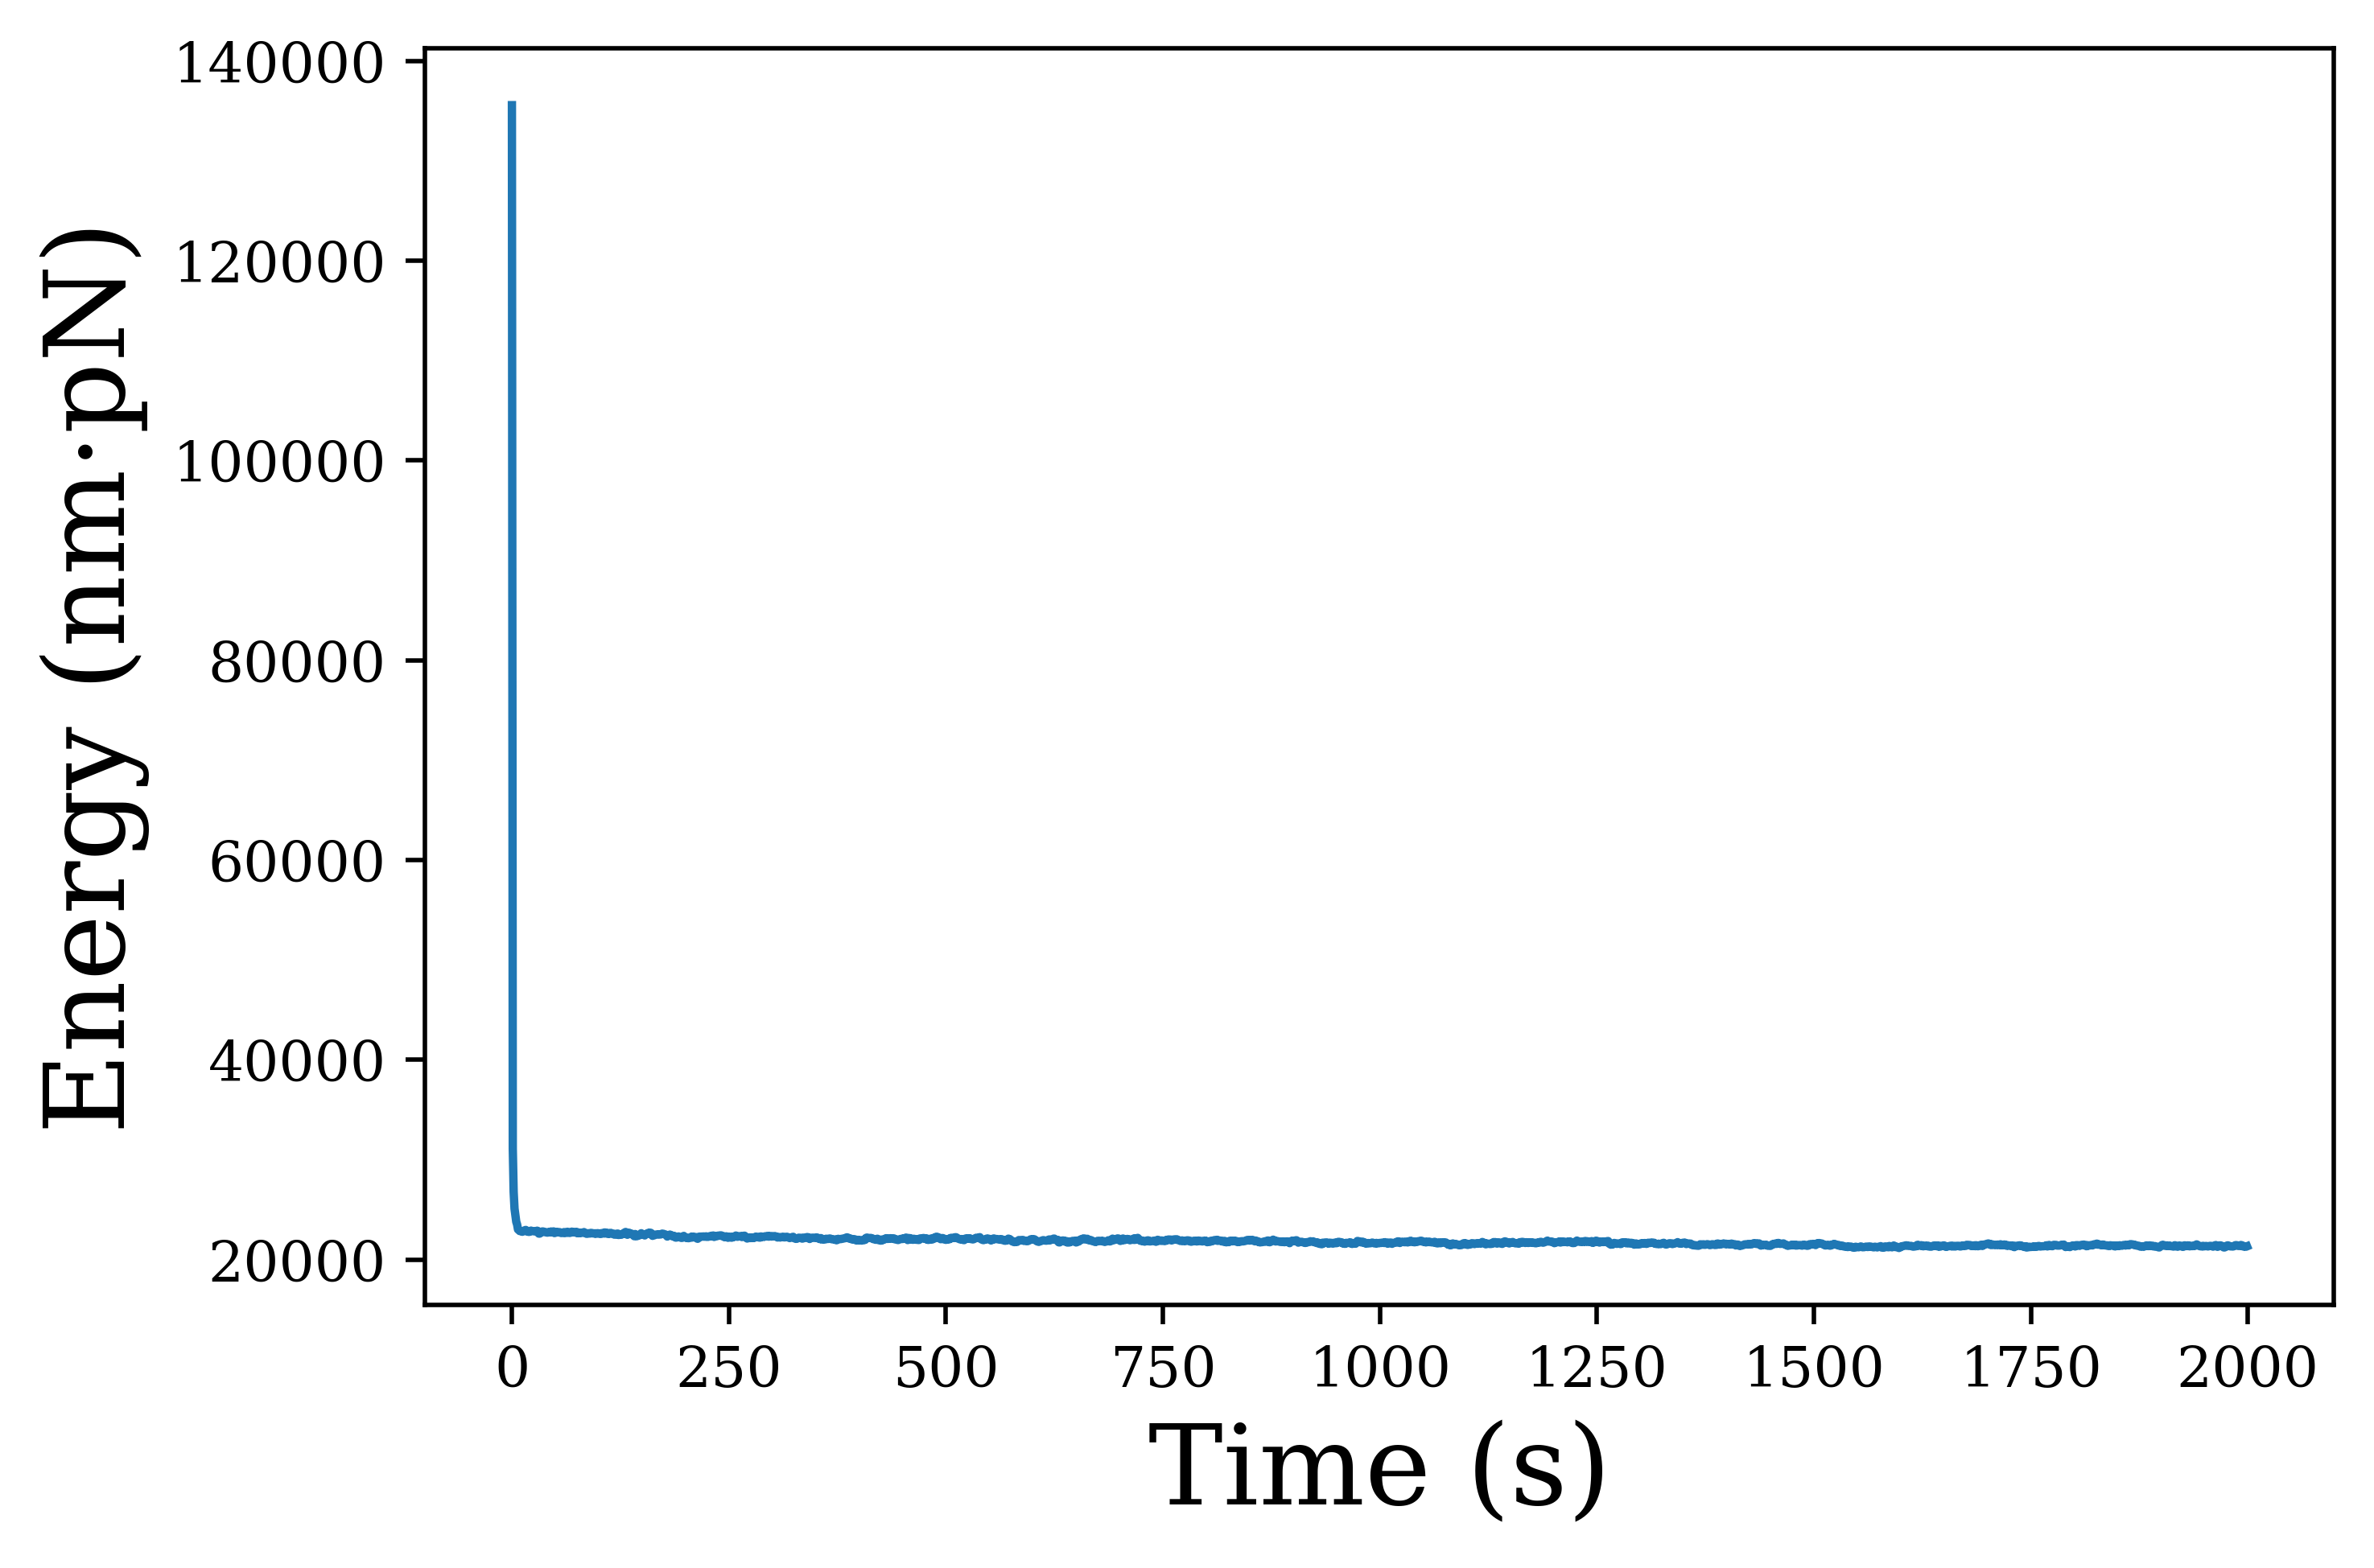

In [18]:
plt.plot(t,E)
plt.xlabel('Time (s)', size = 20)
plt.ylabel('Energy (nm·pN)', size = 20)
plt.tight_layout()
# plt.savefig('Evst_type4conf')

In [ ]:
39232.34387088502/23351.135259157007